<a href="https://colab.research.google.com/github/yyw-informatics/RNA-seq-InfluenzaNP-CD8-T-cells/blob/main/AdditionalFigure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [1]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
required_packages <- c('dplyr','ComplexHeatmap', 'ggnewscale', 'ggplot2','ggrepel','reshape2', 'tidyr','circlize','stringr') #'org.Mm.eg.db',  'biomaRt')
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    install.packages(missing_packages)
}
# Load packages
invisible(lapply(required_packages, library, character.only = TRUE))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.19), R 4.2.1 (2022-06-23)

Installing package(s) 'BiocVersion', 'ComplexHeatmap', 'ggnewscale', 'ggrepel',
  'reshape2', 'circlize'

also installing the dependencies ‘rjson’, ‘BiocGenerics’, ‘S4Vectors’, ‘iterators’, ‘GetoptLong’, ‘clue’, ‘GlobalOptions’, ‘png’, ‘IRanges’, ‘matrixStats’, ‘foreach’, ‘doParallel’, ‘Rcpp’, ‘plyr’, ‘shape’


Old packages: 'data.table', 'devtools', 'digest', 'jsonlite', 'openssl',
  'pkgload', 'processx', 'ps', 'roxygen2', 'sys', 'tibble', 'tidyverse',
  'vctrs', 'xfun', 'yaml', 'zip', 'foreign', 'mgcv', 'rpart'


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatma

### Data 

In [16]:
g <- read.csv('/content/Picked_Genes_Metabolic_profile2.csv')
g$Function <- str_trim(g$Function) # trim white space
g$Function <- gsub("(^|[[:space:]])([[:alpha:]])", "\\1\\U\\2", g$Function,perl = TRUE) # Capitalize first letter 
g$gene_annotation <- paste(g$Gene, g$Annotation1, sep = '-')
rownames(g) <- g$gene_annotation	
up <- g %>% filter(Regulated == "Up") %>% arrange(Function)
down <- g %>% filter(Regulated == "Down") %>% arrange(Function)

In [18]:
y1 <- up %>% dplyr::select(contains('Dose'))  
y2 <- down %>% dplyr::select(contains('Dose')) 

In [19]:
unique(up$Function)
unique(down$Function)

[1] "Fatty Acid" "Glycolysis" "TCA"

character(0)

### Heatmaps

#### Up genes

In [34]:
# Top label: dose
dose_annotation = HeatmapAnnotation(
  Dose = c('Low dose','Low dose','High dose','High dose'),
  col = list(Dose = c("Low dose" = "#C0C0C0", "High dose" = "#2F4F4F")))

# Cell color: expression values
cell_cols <- colorRamp2(c(-2, 0, 2), c("blue", "black", "red"))

# Main heatmap for up genes
h_up_main <- Heatmap(
  y1 %>% t() %>% scale() %>% t(),
  row_split = factor(up$Function, levels = c("TCA","Fatty Acid","Glycolysis")),
  cluster_rows      = FALSE, 
  cluster_columns   = FALSE,
  show_column_dend  = FALSE,
  show_row_dend     = FALSE,
  show_column_names = FALSE,
  col = cell_cols, # defined in previous heatmaps
  width = unit(20, "mm"),
  top_annotation = dose_annotation, # defined in previous heatmaps
  heatmap_legend_param = list(direction = "horizontal", title = "Scaled Expression Value"),
  rect_gp = gpar(col = "white", lwd = 0.5)) # white border 

# Color block for function groups on the left 

# Function annotation colors
func_cols = c(
  'TCA' = "#4297A0", #teal green
  'Fatty Acid' = "#EFE7D3", #ivory
  'Glycolysis' = "#E57F84") #coral                      

h_up_functions <- Heatmap(
  up$Function, 
  row_split = factor(up$Function, levels = c("TCA","Fatty Acid","Glycolysis")),
  name = " ", 
  width = unit(5, "mm"), 
  heatmap_legend_param = list(title = "Metabolic Functions"),
  col = func_cols)
# h_up_functions

In [40]:
# Set plot size
options(repr.plot.width = 12, repr.plot.height = 6)
par(mar=c(0,0,4,0)) # bottom, left, top , right

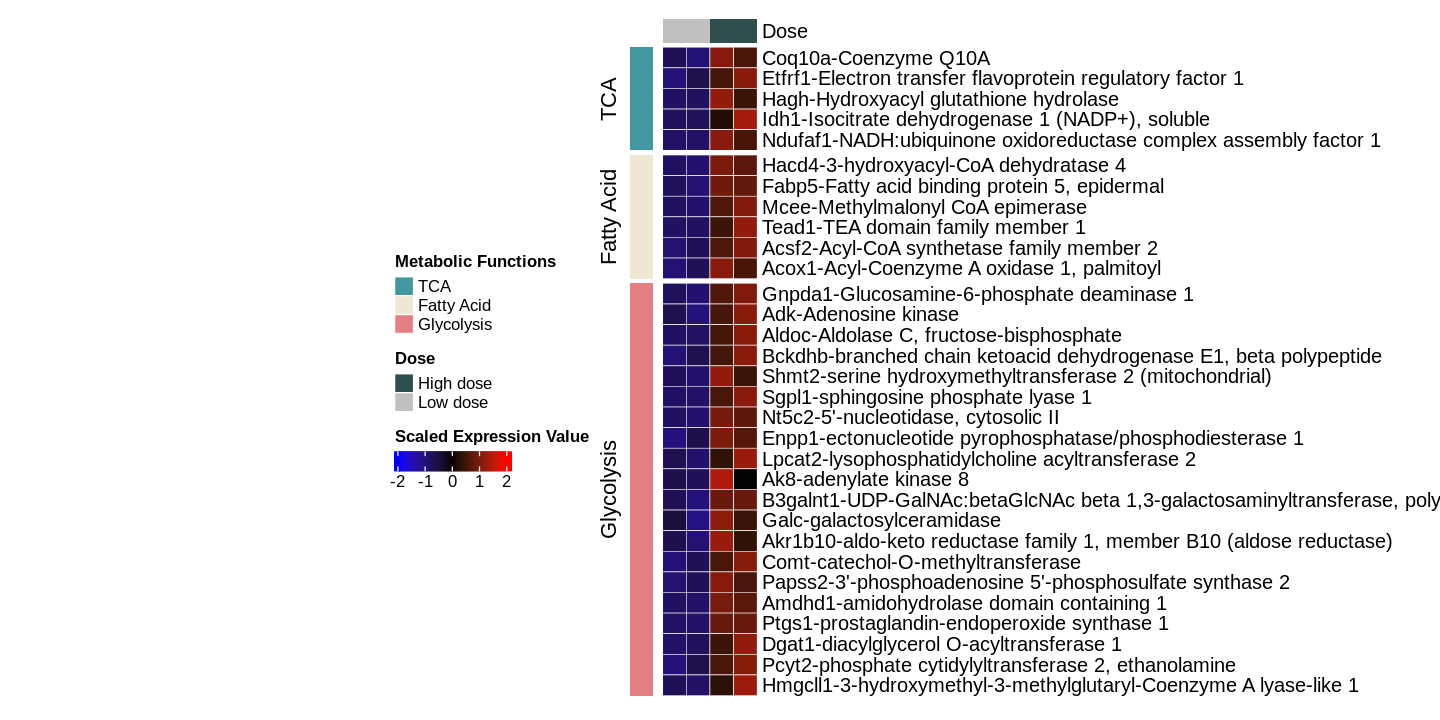

In [41]:
h_up = h_up_functions + h_up_main 
ComplexHeatmap::draw(h_up, 
  heatmap_legend_side = "left", 
  annotation_legend_side = "left", 
  merge_legend = TRUE,
  #legend_grouping = "original",
  padding = unit(c(2, 3, 4, 2), "mm"))